In [1]:
import numpy as np
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut
import matplotlib.pyplot as plt
import os
from os import listdir
import cv2
import matplotlib.patches as patches

In [2]:
from ipywidgets import interact, interactive, IntSlider, Layout
import ipywidgets as widgets
import pandas as pd
import matplotlib.pyplot as plt
import random
import gc

In [7]:
path = "E:/bone_fracture_dataset/Case_1/dicom_original"

In [8]:
def load_scan(path):
    slices = [pydicom.dcmread(path + '/' +s) for s in os.listdir(path)]
    slices.sort(key=lambda x:float(x.ImagePositionPatient[2]))
    return slices

In [9]:
scans = load_scan(path)

In [11]:
scans[28]

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 210
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.2.407581950710663552638028266640676280760
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.9590.100.1.3.100.9.4
(0002, 0013) Implementation Version Name         SH: 'MATLAB IPT 9.4'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9590.100.1.2.407581950710663552638028266640676280760


In [14]:
ab = scans[10].pixel_array
slope = scans[10].RescaleSlope
intercept = scans[10].RescaleIntercept
img_1 = ab*slope+intercept

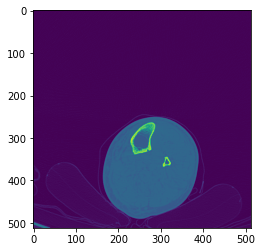

In [15]:
plt.imshow(img_1)

In [16]:
abc = cv2.resize(ab, (128, 128))

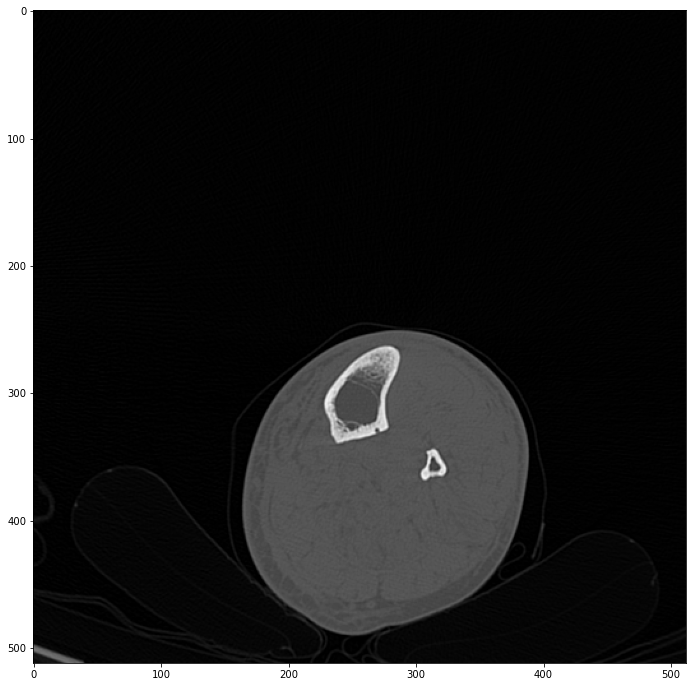

In [17]:
plt.figure(figsize=(12, 12))
plt.imshow(img_1, 'gray')

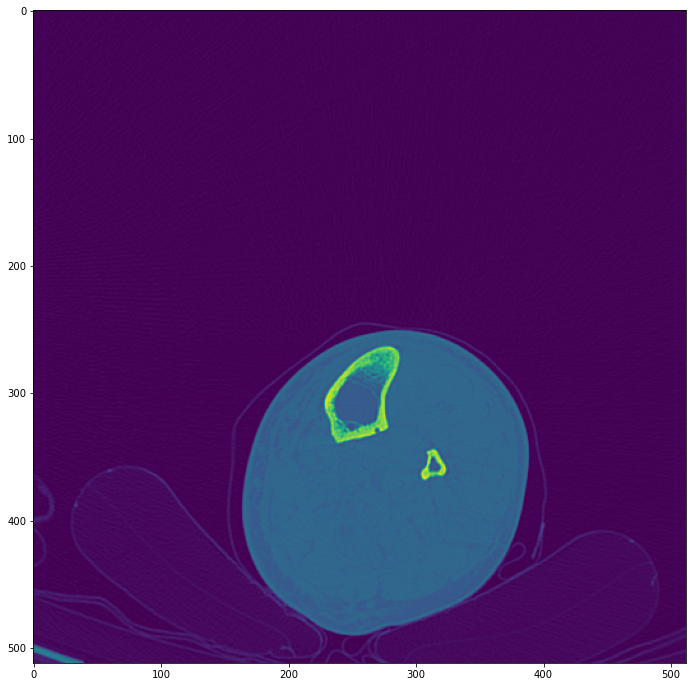

In [18]:
plt.figure(figsize=(12, 12))
plt.imshow(img_1)

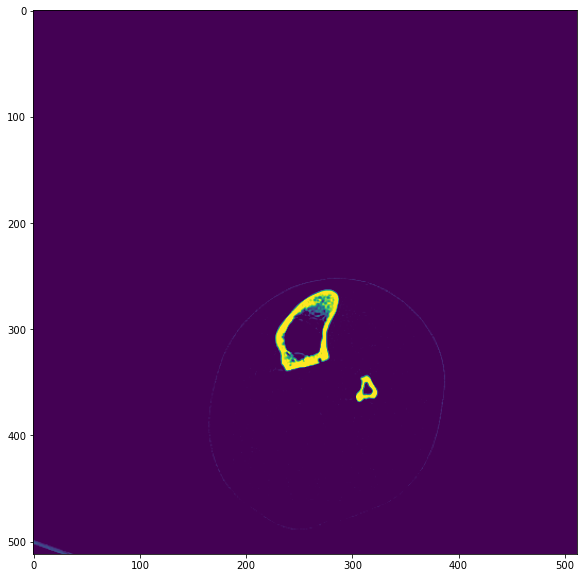

In [19]:
DIM = 10
fig = plt.figure(figsize=(DIM, DIM))
W = 1200
L = 700
img_min = L-W // 2
img_max = L+W // 2
test_img_1 = img_1.copy()
test_img_1[test_img_1 < img_min] = img_min
test_img_1[test_img_1 > img_max] = img_max
plt.imshow(test_img_1)
plt.show()

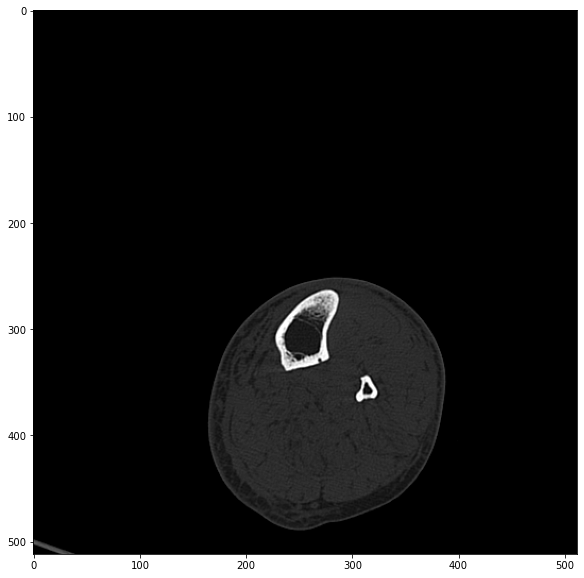

In [20]:
DIM = 10
fig = plt.figure(figsize=(DIM, DIM))
W = 2000
L = 700
img_min = L-W // 2
img_max = L+W // 2
test_img = img_1.copy()
test_img[test_img < img_min] = img_min
test_img[test_img > img_max] = img_max
plt.imshow(test_img, 'gray')
plt.show()

In [21]:
dim = 6
min_hu = min(img_1.flatten(). tolist())//10*10
max_hu = max(img_1.flatten().tolist())//10*10

W = widgets.IntSlider(description='W', min=min_hu, max=max_hu, step=10)
L = widgets.IntSlider(description='L', min=min_hu, max=max_hu, step=10)

def f(W, L):
    img_min = L-W // 2
    img_max = L+W // 2
    
    test_img = img_1.copy()
    
    test_img[test_img <= img_min] = img_min
    test_img[test_img >= img_max] = img_max
    
    fig = plt.figure(figsize=(DIM, DIM))
    plt.imshow(test_img)

out = widgets.interactive_output(f, {'W' : W, 'L' : L})
widgets.HBox([widgets.VBox([W, L]), out])

In [22]:
dim = 6
min_hu = min(img_1.flatten(). tolist())//10*10
max_hu = max(img_1.flatten().tolist())//10*10

W = widgets.IntSlider(description='W', min=min_hu, max=max_hu, step=10)
L = widgets.IntSlider(description='L', min=min_hu, max=max_hu, step=10)

def f(W, L):
    img_min = L-W // 2
    img_max = L+W // 2
    
    test_img = img_1.copy()
    
    test_img[test_img <= img_min] = img_min
    test_img[test_img >= img_max] = img_max
    
    fig = plt.figure(figsize=(DIM, DIM))
    plt.imshow(test_img, 'gray')

out = widgets.interactive_output(f, {'W' : W, 'L' : L})
widgets.HBox([widgets.VBox([W, L]), out])

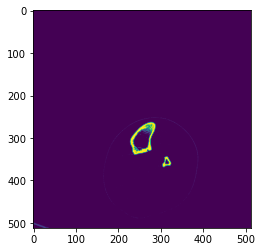

In [23]:
plt.imshow(test_img_1)

In [24]:
test_img_1.shape

(512, 512)

In [25]:
im = cv2.resize(test_img_1,(128, 128))

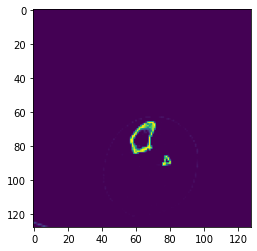

In [26]:
plt.imshow(im)

In [27]:
im.shape

(128, 128)

In [28]:
np.max(im)

1300.0

In [29]:
np.min(im)

100.0

In [30]:
im[0]

array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100.])

In [31]:
im[0, 0]

100.0

In [32]:
im.shape[1]

128

In [33]:
im[25, 20]

100.0

In [34]:
a1 = np.zeros((im.shape[0], im.shape[1]), dtype=float)

In [35]:
a1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
im = im/np.max(im)

In [37]:
im

array([[0.07692308, 0.07692308, 0.07692308, ..., 0.07692308, 0.07692308,
        0.07692308],
       [0.07692308, 0.07692308, 0.07692308, ..., 0.07692308, 0.07692308,
        0.07692308],
       [0.07692308, 0.07692308, 0.07692308, ..., 0.07692308, 0.07692308,
        0.07692308],
       ...,
       [0.31846154, 0.24634615, 0.11192308, ..., 0.07692308, 0.07692308,
        0.07692308],
       [0.07692308, 0.07692308, 0.17403846, ..., 0.07692308, 0.07692308,
        0.07692308],
       [0.07692308, 0.07692308, 0.07692308, ..., 0.07692308, 0.07692308,
        0.07692308]])

In [38]:
from skimage.measure import find_contours, label, regionprops

In [39]:
def mask(mask):
    h, w = 128, 128
    border = np.zeros((128, 128))
    find_c = find_contours(mask, 0.65)
    for w_contours in find_c:
        for x in w_contours:
            a = x[0].astype('uint8')
            print(a)
            b = x[1].astype('uint8')
            print(b)
            border[a][b] = 128
    return border

In [40]:
def mask_to_bounding_box(mask):
    avi = []
    lab = label(mask)
    label_ = regionprops(lab)
    for a1 in label_:
        x1 = a1.bbox[1]
        y1 = a1.bbox[0]
        x2 = a1.bbox[3]
        y2 = a1.bbox[2]
        avi.append([x1, y1, x2, y2])
    return avi

In [41]:
im.shape

(128, 128)

In [42]:
b = mask(im)

71
70
71
69
70
69
70
68
69
68
69
67
68
68
68
68
67
69
67
69
66
69
67
68
67
68
67
67
66
67
66
66
65
67
65
68
65
69
65
70
66
70
66
71
67
71
68
71
69
71
69
71
70
70
71
70
71
70
71
61
71
60
70
60
69
61
69
61
68
62
68
63
68
63
67
64
67
64
66
65
66
66
67
66
67
67
68
67
68
67
69
66
69
66
69
65
69
64
69
63
70
62
70
62
71
61
71
61
84
60
84
59
84
58
83
58
82
58
82
57
81
57
80
57
79
57
78
57
78
56
77
56
76
56
75
57
75
57
74
57
73
58
73
58
72
59
72
59
71
60
72
60
73
60
73
60
74
59
74
59
75
58
76
58
77
58
78
58
79
58
79
59
80
59
81
59
81
60
82
60
82
61
82
62
82
62
81
63
81
63
80
64
80
65
80
66
80
66
79
67
79
67
78
67
77
67
76
67
75
67
74
67
73
68
74
68
75
68
76
68
77
68
78
68
79
68
80
68
80
69
81
69
81
69
82
68
82
68
82
67
81
67
82
66
82
66
83
65
83
65
83
64
83
63
83
62
83
61
84
60
84
60
73
69
73
68
72
68
71
69
72
69
73
69
73
69
91
77
91
76
91
75
90
75
89
76
89
76
88
76
87
76
86
76
85
77
85
78
86
78
86
79
87
79
88
79
88
79
88
78
87
78
88
77
89
77
90
77
91
77
91
77
90
80
90
79
90
78
89
79
89
79
88
8

In [43]:
b.shape

(128, 128)

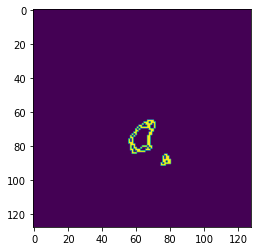

In [44]:
plt.imshow(b)

In [45]:
c = mask_to_bounding_box(b)

In [46]:
c

[[56, 65, 72, 85], [75, 85, 81, 92]]

In [1]:
len(c)

NameError: name 'c' is not defined

In [47]:
x_min_1 = np.min(c[0])

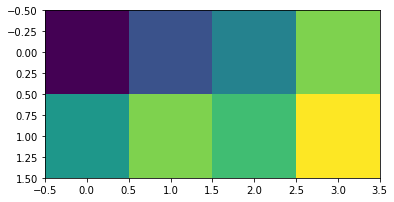

In [48]:
plt.imshow(c)

In [49]:
x_min_1

56

In [50]:
y_min_1 = c[0][1]

In [51]:
y_min_1

65

In [52]:
c[0][1]

65

In [53]:
img_1 = cv2.imread("E:/Bone/Dataset/Dataset/Annotation/LowerLimb/PartLeft/Case1/Superimposed/10-knee-whole-Superimposed.png", 0)

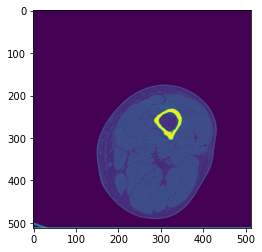

In [54]:
plt.imshow(img_1)

In [55]:
img_1 = cv2.resize(img_1, (128, 128))

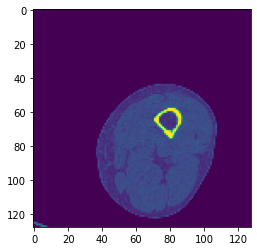

In [56]:
plt.imshow(img_1)

In [57]:
w1 = c[0][2]-x_min_1
h1 = c[0][3]-y_min_1
x_min_2 = c[1][0]
y_min_2 = c[1][1]
w2 = c[1][2]-x_min_2
h2 = c[1][3]-y_min_2

In [58]:
def show_img(im, x_min_1, y_min_1, w1, h1, x_min_2, y_min_2, w2, h2):
    fig, ax = plt.subplots(1)
    plt.imshow(im)
    rect1 = patches.Rectangle((x_min_1, y_min_1), w1, h1, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect1)
    rect2 = patches.Rectangle((x_min_2, y_min_2), w2, h2, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect2)
    plt.show()

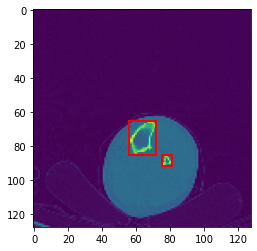

In [59]:
show_img(abc, x_min_1, y_min_1, w1, h1, x_min_2, y_min_2, w2, h2)

for abc in c:
    patches.Rectangle()